# 750 MeV

In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [22]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
with open('spill_data_xsec_2022_10_18_13h59m03s/spill_data_xsec_2022_10_18_13h59m03s.p', 'rb') as f:
    data = pickle.load(f)

In [4]:
data[0][0]

datetime.datetime(2022, 10, 18, 13, 59, 5, 938863)

In [5]:
time_list = []
for i in range(len(data[0])):
    time_list.append(data[0][i].strftime("%Hh%Mm%Ss"))

In [6]:
data[1].keys()

dict_keys(['F61.XSEC023-I1/SpillData', 'F61.XSEC023-I2/SpillData', 'F61.XSEC023-I1/Acquisition', 'F61.XSEC023-I2/Acquisition'])

In [7]:
data[1]['F61.XSEC023-I1/SpillData'][0]

{'semSpillData': array([   -29,     43,   -145,     84,    -14,     19,    -15,     71,
           -71,     50,    -13,     77,    -93,  -6905, -14363, -11895,
        -10624, -10116,  -9923, -10059, -10178,  -9766,  -9859,  -9805,
         -9688,  -9036,  -9095,  -8838,  -8721,  -8282,  -8961,  -9217,
         -3969,   -279,     25,    -69,    136,    -16,    -97,     42,
            10,     69], dtype=int32)}

In [8]:
data[1]['F61.XSEC023-I2/SpillData'][0]

{'semSpillData': array([   -25,     46,   -139,     88,    -21,     15,     -9,     65,
           -80,     52,    -11,     69,    -96,  -6954, -14404, -11933,
        -10659, -10161,  -9971, -10109, -10229,  -9815,  -9912,  -9858,
         -9749,  -9096,  -9148,  -8892,  -8782,  -8342,  -9011,  -9282,
         -4006,   -285,     16,    -72,    126,    -18,   -106,     29,
             0,     46], dtype=int32)}

In [9]:
data[1]['F61.XSEC023-I1/Acquisition'][0]

{'measStamp': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'cycleTime': '',
 'superCycleNb': 5,
 'acqDesc': '',
 'nbOfSamples': 42,
 'semRawData': -68217,
 'semSignalStatus': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8),
 'acqTime': '',
 'semNormData': 19438737500.0,
 'observables': [],
 'totalGain': array([400.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   

# Plot

In [10]:
integrationDuration = data[1]['F61.XSEC023-I1/Acquisition'][0]["integrationDuration"]
print(integrationDuration)
nbOfSamples = data[1]['F61.XSEC023-I1/Acquisition'][0]["nbOfSamples"]
print(nbOfSamples)

840
42


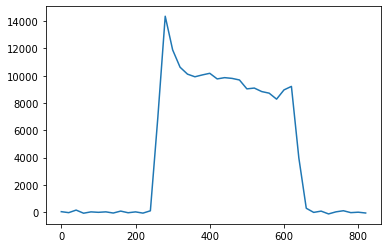

In [11]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))
signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][0]["semSpillData"]
signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][0]["semSpillData"]

d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
df = pd.DataFrame(data=d)


fig, ax = plt.subplots()
ax.plot(df.t, -df.signal_23_I1)

In [12]:
heatmap = np.reshape(signal_23_I1, (1, len(signal_23_I1)))

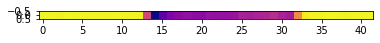

In [13]:
fig, ax = plt.subplots()
ax.imshow(heatmap, cmap="plasma")

In [14]:
signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][0]["semSpillData"]
heatmap = np.reshape(signal_23_I1, (1, len(signal_23_I1)))
for i in range(len(data[1]['F61.XSEC023-I1/SpillData'])):
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    heatmap=np.vstack([-signal_23_I1, heatmap])

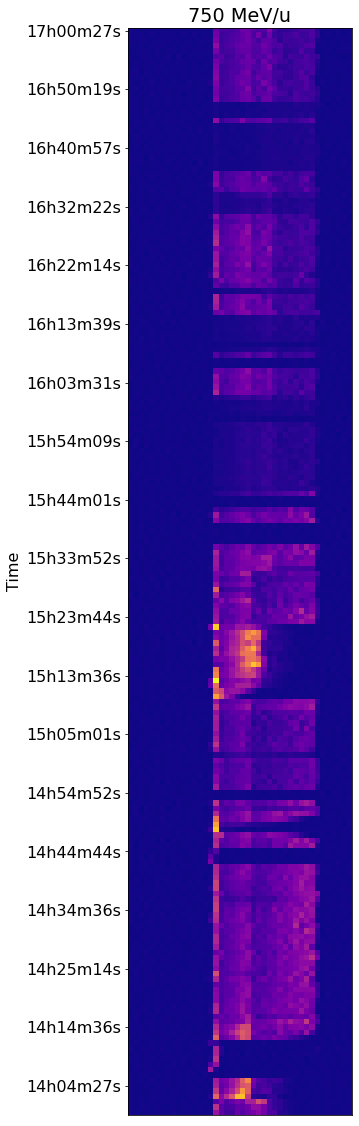

In [54]:
fig, ax = plt.subplots(figsize=(10,20))
ax.imshow(heatmap[:-2], cmap="plasma")

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
step = np.shape(heatmap)[0]//20 + 1
ax.set_yticks(np.arange(0, np.shape(heatmap)[0],  step))
try:
    ax.set_yticklabels(time_list[:2:-step]) # Reverse order
except:
    print("error on yticklabels")

ax.set_ylabel("Time")
ax.set_title("750 MeV/u")
plt.savefig("xsec_spill_history_750_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

Text(0.5, 1.0, '750 MeV/u')

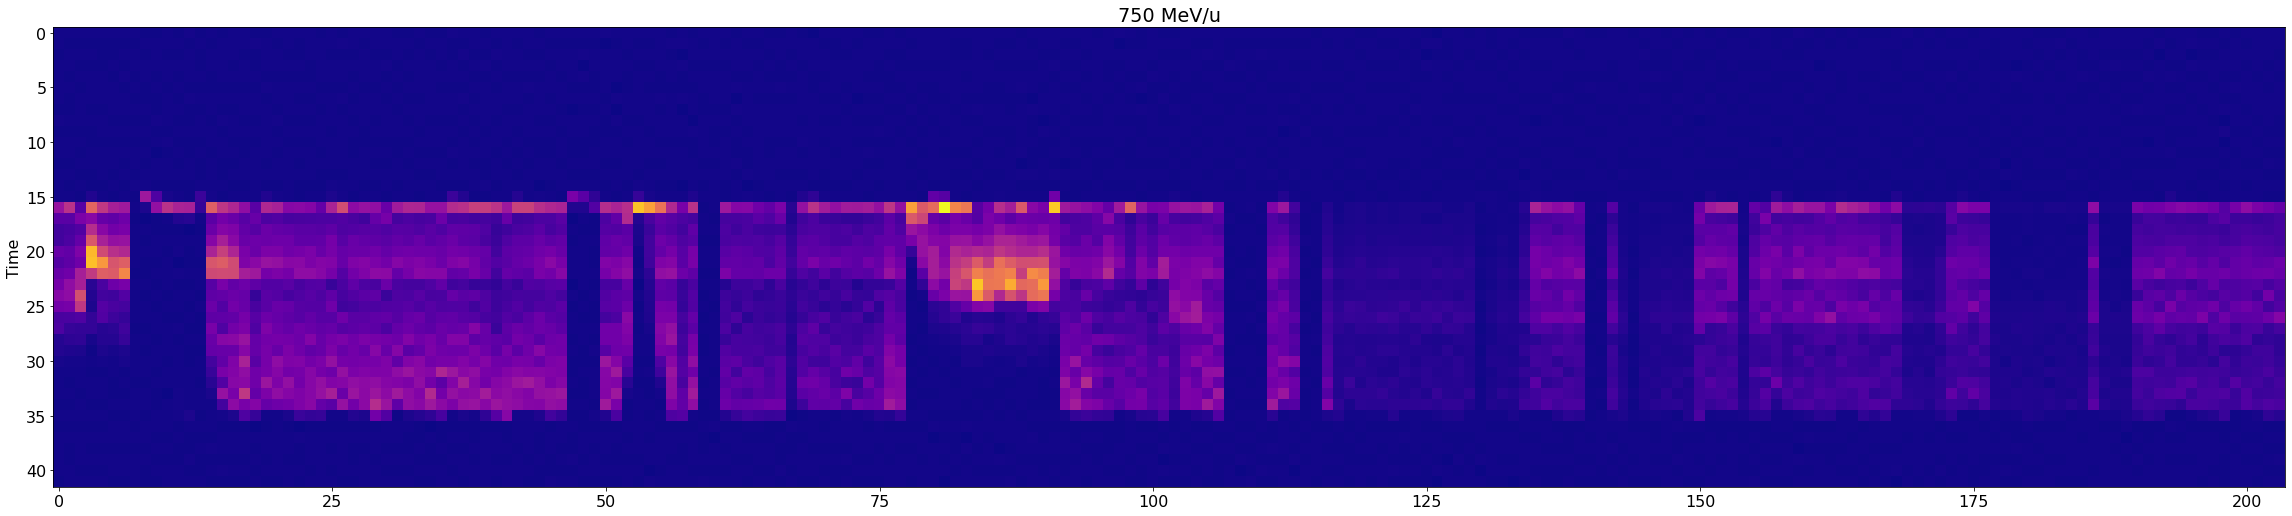

In [55]:
fig, ax = plt.subplots(figsize=(40,10))
ax.imshow(heatmap[-3::-1].T, cmap="plasma")

ax.set_ylabel("Time")
ax.set_title("750 MeV/u")
# plt.savefig("xsec_spill_history_750_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

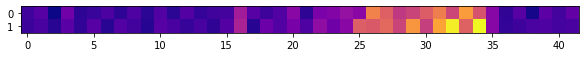

In [16]:
fig, ax = plt.subplots(figsize=(10,20))
ax.imshow(heatmap[15:17], cmap="plasma")

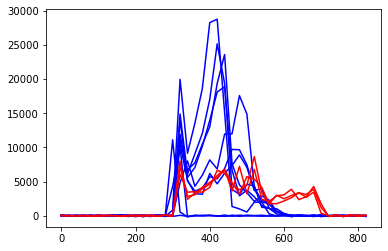

In [17]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
# First shots
for i in np.linspace(1,10,10):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="b")
    
# Last shots
for i in [-1,-2,-3]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="r")

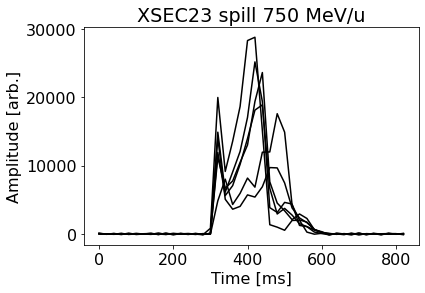

In [38]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
# First shots
for i in np.arange(2,8,1):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="k")

ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 750 MeV/u")
plt.savefig("xsec_750_MeV_initial_spill.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

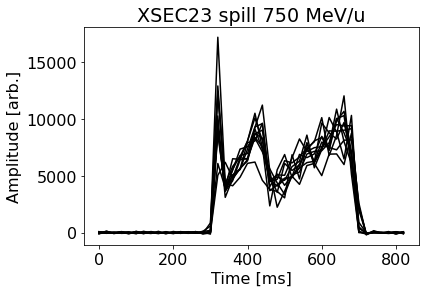

In [57]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
# First shots
for i in np.arange(19,30,1):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="k")

ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 750 MeV/u")
plt.savefig("xsec_750_MeV_better_tune.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

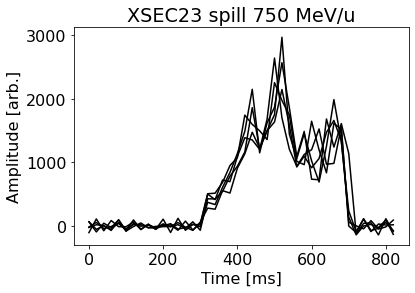

In [56]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()
# First shots
for i in np.arange(120,125,1):
    i = int(i)
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="k")

ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 750 MeV/u")
# plt.savefig("xsec_750_MeV_better_tune.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')

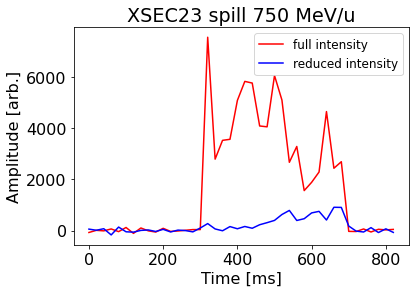

In [64]:
t = np.arange(0, integrationDuration, int(integrationDuration / nbOfSamples))

fig, ax = plt.subplots()

# Last shots
for i in [200]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="r", label="full intensity")

# Last shots
for i in [180]:
    signal_23_I1 = data[1]['F61.XSEC023-I1/SpillData'][i]["semSpillData"]
    signal_23_I2 = data[1]['F61.XSEC023-I2/SpillData'][i]["semSpillData"]

    d = {'t': t, 'signal_23_I1': signal_23_I1, 'signal_23_I2': signal_23_I2} # Flip the sign of the signal to have positive spill
    df = pd.DataFrame(data=d)


    ax.plot(df.t, -df.signal_23_I1, color="b", label="reduced intensity")
    
ax.legend(fontsize=12)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Amplitude [arb.]")
ax.set_title("XSEC23 spill 750 MeV/u")
plt.savefig("xsec_750_MeV_bump_comparison.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')